In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
t = Table().with_columns(
    'Name', make_array('Lonzo', 'Tony', 'Victor E.'),
    'Species', make_array('cat', 'tiger', 'bulldog'),
    'Age', make_array(5, 2025 - 1952, 8)
)
t

Name,Species,Age
Lonzo,cat,5
Tony,tiger,73
Victor E.,bulldog,8


In [3]:
t.num_rows

3

In [4]:
t.num_columns

3

In [5]:
t.labels

('Name', 'Species', 'Age')

In [6]:
t.select('Name', 2) # label or index

Name,Age
Lonzo,5
Tony,73
Victor E.,8


In [7]:
t.relabeled('Name', 'Nombre')

Nombre,Species,Age
Lonzo,cat,5
Tony,tiger,73
Victor E.,bulldog,8


In [8]:
t.drop('Age')

Name,Species
Lonzo,cat
Tony,tiger
Victor E.,bulldog


In [67]:
t2 = Table().with_columns(
    'x', np.arange(1, 101, 5),
    'y', np.arange(200, 0, -10)
)
t2

x,y
1,200
6,190
11,180
16,170
21,160
26,150
31,140
36,130
41,120
46,110


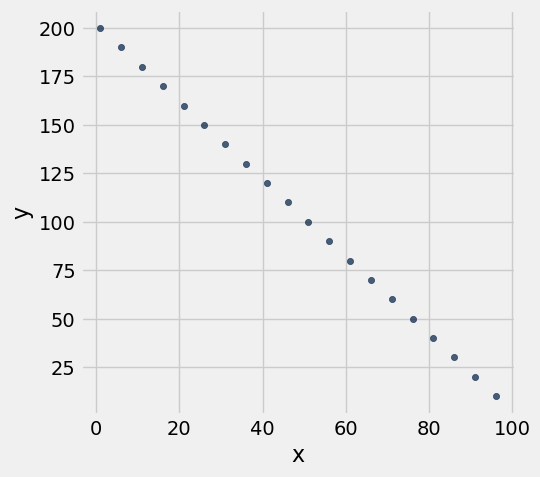

In [68]:
t2.scatter('x')

---

In [9]:
words = Table.read_table('data/wordle.csv')
words

Words
cigar
rebut
sissy
humph
awake
blush
focal
evade
naval
serve


In [10]:
for c in 'hello':
    print(c)

h
e
l
l
o


In [11]:
def str_to_array(s):
    array = make_array()

    for c in s:
        array = np.append(array, c)

    return array

In [12]:
np.append(str_to_array('hello'), str_to_array('world'))

array(['h', 'e', 'l', 'l', 'o', 'w', 'o', 'r', 'l', 'd'],
      dtype='<U32')

In [13]:
letters_in_every_word = make_array()

for word in words.column(0):
    letters_in_every_word = np.append(letters_in_every_word, str_to_array(word))

letters_in_every_word

array(['c', 'i', 'g', ..., 'a', 'v', 'e'],
      dtype='<U32')

In [14]:
len(letters_in_every_word)

11575

In [15]:
letters = Table().with_column(
    'Letter', str_to_array('abcdefghijklmnopqrstuvwxyz'),
)
letters.show()

Letter
a
b
c
d
e
f
g
h
i
j


In [16]:
np.count_nonzero(letters_in_every_word == 'h')

389

In [17]:
def count_character(c):
    return np.count_nonzero(letters_in_every_word == c)

In [18]:
count_character('h')

389

In [19]:
count_character('e')

1233

In [20]:
letters.apply(count_character, 'Letter')

array([ 979,  281,  477,  393, 1233,  230,  311,  389,  671,   27,  210,
        719,  316,  575,  754,  367,   29,  899,  669,  729,  467,  153,
        195,   37,  425,   40])

In [21]:
letters_and_counts = letters.with_column(
    'Count', letters.apply(count_character, 'Letter')
)
letters_and_counts.show()

Letter,Count
a,979
b,281
c,477
d,393
e,1233
f,230
g,311
h,389
i,671
j,27


In [22]:
letters_and_counts.sort('Count', descending=True).show()

Letter,Count
e,1233
a,979
r,899
o,754
t,729
l,719
i,671
s,669
n,575
c,477


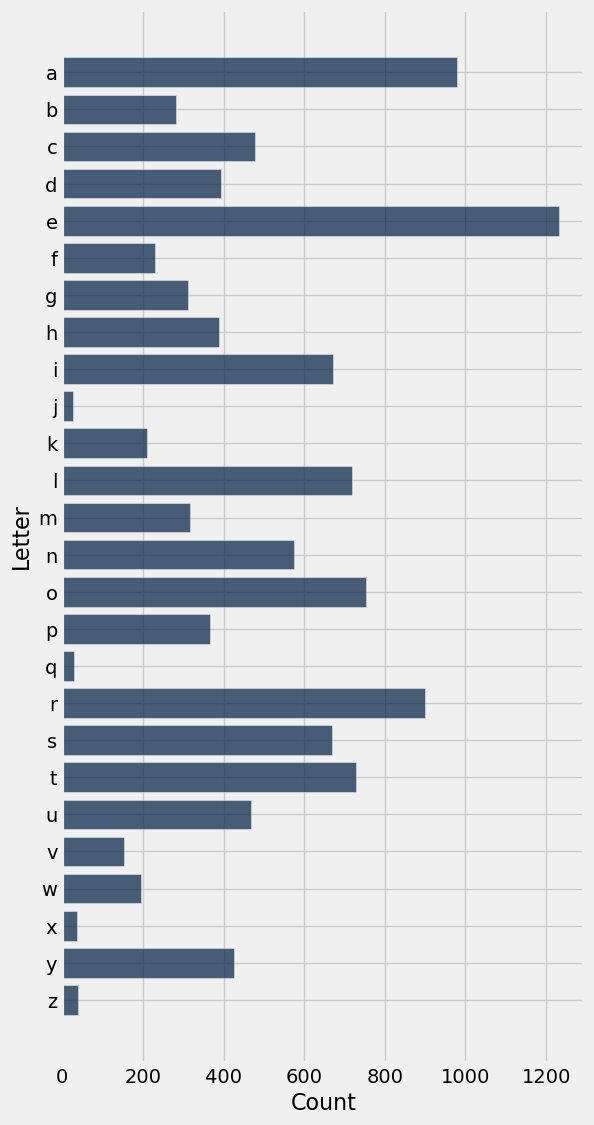

In [23]:
letters_and_counts.barh('Letter')

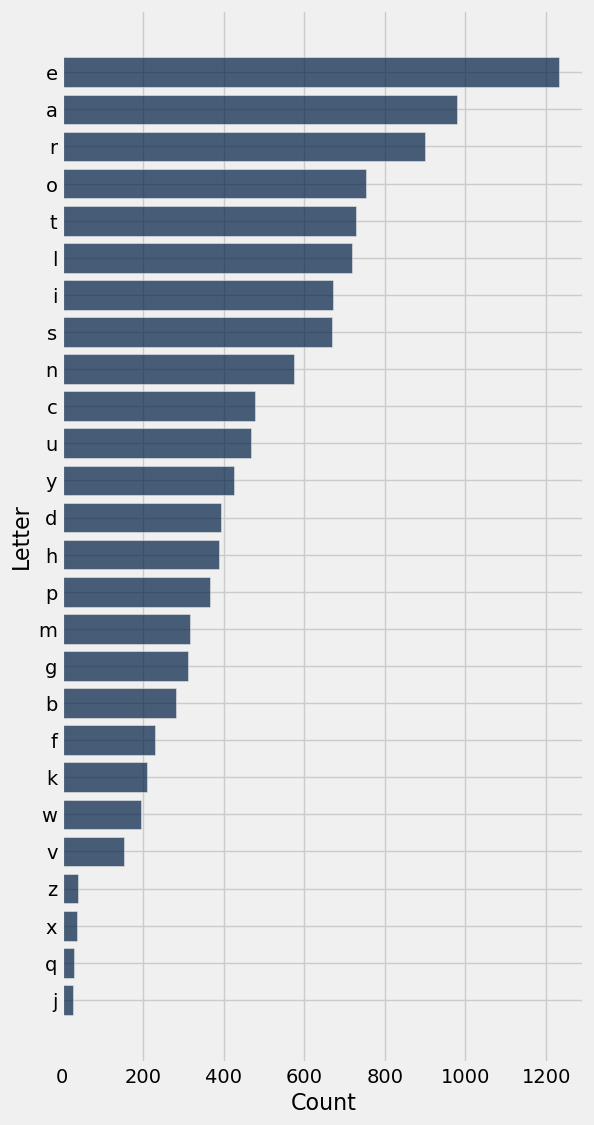

In [24]:
letters_and_counts.sort('Count', descending=True).barh('Letter')

In [25]:
words

Words
cigar
rebut
sissy
humph
awake
blush
focal
evade
naval
serve


In [26]:
words.where('Words', are.containing('e'))

Words
rebut
awake
evade
serve
heath
model
grade
quiet
bench
abate


In [27]:
words.where('Words', are.containing('e')).where('Words', are.containing('a'))

Words
awake
evade
heath
grade
abate
death
abase
react
paper
adobe


In [28]:
words.where('Words', are.containing('e')).where('Words', are.containing('a')).where('Words', are.containing('r'))

Words
grade
react
paper
repay
crate
yearn
agree
argue
great
break


In [29]:
words.where('Words', are.containing('e')).where('Words', are.containing('a')).where('Words', are.containing('r')).where('Words', are.containing('o'))

Words
adore
arose
opera


In [37]:
array = str_to_array('arose')

letters_and_counts.where('Letter', array.item(0)).row(0).item(1)

979

In [38]:
score = 0
score = score + letters_and_counts.where('Letter', array.item(0)).row(0).item(1)
score = score + letters_and_counts.where('Letter', array.item(1)).row(0).item(1)
score = score + letters_and_counts.where('Letter', array.item(2)).row(0).item(1)
score = score + letters_and_counts.where('Letter', array.item(3)).row(0).item(1)
score = score + letters_and_counts.where('Letter', array.item(4)).row(0).item(1)
score

4534

In [42]:
def get_score(word):
    array = str_to_array(word)
    
    score = 0
    score = score + letters_and_counts.where('Letter', array.item(0)).row(0).item(1)
    score = score + letters_and_counts.where('Letter', array.item(1)).row(0).item(1)
    score = score + letters_and_counts.where('Letter', array.item(2)).row(0).item(1)
    score = score + letters_and_counts.where('Letter', array.item(3)).row(0).item(1)
    score = score + letters_and_counts.where('Letter', array.item(4)).row(0).item(1)
    return score

In [43]:
words.apply(get_score, 0)

array([3337, 3609, 3103, ..., 3701, 3963, 3423])

In [44]:
words_with_scores = words.with_column(
    'Score', words.apply(get_score, 0)
)
words_with_scores

Words,Score
cigar,3337
rebut,3609
sissy,3103
humph,1928
awake,3596
blush,2525
focal,3159
evade,3991
naval,3405
serve,4187


In [47]:
words_with_scores.sort('Score', descending=True)

Words,Score
eerie,5269
eater,5073
erase,5013
rarer,4909
elate,4893
tease,4843
easel,4833
lease,4833
tepee,4795
reset,4763


In [52]:
Table().with_column('Letter', str_to_array('eerie')).group('Letter').num_rows

3

In [53]:
def has_duplicates(word):
    unique_letters = Table().with_column('Letter', str_to_array(word)).group('Letter').num_rows

    if unique_letters == 5:
        return 0
    else:
        return 1

In [54]:
words_with_scores.apply(has_duplicates, 'Words')

array([0, 0, 1, ..., 0, 1, 0])

In [55]:
words_scores_duplicates = words_with_scores.with_column(
    'Has Duplicates', words_with_scores.apply(has_duplicates, 'Words')
)
words_scores_duplicates

Words,Score,Has Duplicates
cigar,3337,0
rebut,3609,0
sissy,3103,1
humph,1928,1
awake,3596,1
blush,2525,0
focal,3159,0
evade,3991,1
naval,3405,1
serve,4187,1


In [57]:
words_scores_duplicates.sort('Score', descending=True).where('Has Duplicates', 0)

Words,Score,Has Duplicates
later,4559,0
alter,4559,0
alert,4559,0
arose,4534,0
irate,4511,0
stare,4509,0
arise,4451,0
raise,4451,0
learn,4405,0
renal,4405,0


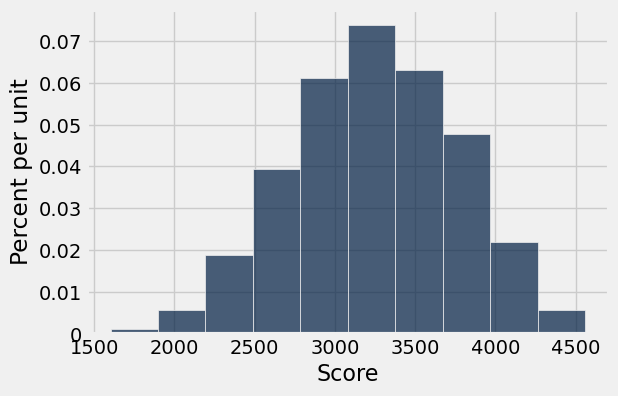

In [69]:
words_scores_duplicates.sort('Score', descending=True).where('Has Duplicates', 0).hist('Score')